Version 1.0.3

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [2]:
DATA_FOLDER = '../readonly/final_project_data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [3]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [4]:
# YOUR CODE GOES HERE
dfs = [transactions, items, item_categories, shops]
for df in dfs:
    print(df.shape)

(2935849, 6)
(22170, 3)
(84, 2)
(60, 2)


Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with strings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [6]:
for df in dfs:
    print(df.head())

         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0
                                           item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)                       D        4   

   item_category_id  
0                40  
1                76  
2                40  
3                40  
4                40  
        item_category_name  item_

In [23]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year
0,02.01.2013,0,59,22154,999.00,1.0,02,01,2013
1,03.01.2013,0,25,2552,899.00,1.0,03,01,2013
2,05.01.2013,0,25,2552,899.00,-1.0,05,01,2013
3,06.01.2013,0,25,2554,1709.05,1.0,06,01,2013
4,15.01.2013,0,25,2555,1099.00,1.0,15,01,2013


In [24]:
transactions['day'] = transactions.date.str[:2]
transactions['month'] = transactions.date.str[3:5]
transactions['year'] = transactions.date.str[-4:]
transactions['revenue'] = transactions.item_price * transactions.item_cnt_day

In [30]:
transactions_sep2014 = transactions[(transactions.month == '09') & (transactions.year == '2014')]

In [18]:
# 50 unique shops
transactions_sep2014.shop_id.nunique()

50

In [31]:
transactions_sep2014.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,revenue
1953691,24.09.2014,20,5,1039,899.0,1.0,24,09,2014,899.0
1953692,27.09.2014,20,5,1015,449.0,1.0,27,09,2014,449.0
1953693,07.09.2014,20,5,1329,399.0,1.0,07,09,2014,399.0
1953694,27.09.2014,20,5,984,399.0,1.0,27,09,2014,399.0
1953695,08.09.2014,20,5,984,399.0,1.0,08,09,2014,399.0


In [34]:
transactions_sep2014.groupby('shop_id').sum().revenue.max()

7982852.199999956

In [36]:
transactions_sep2014.groupby('shop_id').sum().revenue.idxmax()

31

In [37]:
# YOUR CODE GOES HERE

max_revenue = 7982852.199999956
grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 7982852.199999956


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [43]:
summer = (transactions.month == '06') | (transactions.month == '07') | (transactions.month == '08')
transactions_summer2014 = transactions[summer & (transactions.year == '2014')]

In [44]:
transactions_summer2014.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,revenue
1705909,15.06.2014,17,26,9532,399.00,1.0,15,06,2014,399.00
1705910,10.06.2014,17,26,9507,149.00,1.0,10,06,2014,149.00
1705911,13.06.2014,17,26,9509,246.32,1.0,13,06,2014,246.32
1705912,03.06.2014,17,26,9532,399.00,1.0,03,06,2014,399.00
1705913,08.06.2014,17,26,9532,399.00,1.0,08,06,2014,399.00


In [46]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [57]:
transactions_summer2014 = transactions_summer2014.join(items, on='item_id', lsuffix='_trans', rsuffix='_items')

In [72]:
rev_by_cat_id = transactions_summer2014.groupby('item_category_id').sum().revenue
rev_by_cat_id

item_category_id
2     2755520.0
3     6854669.8
4       38833.2
5      418233.1
6     3360382.5
        ...    
78      55771.0
79    1080480.0
81        599.0
82       1629.0
83      52762.0
Name: revenue, Length: 66, dtype: float64

In [78]:
rev_by_cat_id.argmax()

15

In [79]:
rev_by_cat_id[20]

32157302.430000115

In [80]:
rev_by_cat_id.iloc[15]

32157302.430000115

In [81]:
# YOUR CODE GOES HERE

category_id_with_max_revenue = 20
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

Current answer for task category_id_with_max_revenue is: 20


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [87]:
#21,807 products in total
transactions.item_id.nunique()

21807

In [103]:
tran_42 = transactions[transactions.item_id == 42]
tran_42 = tran_42[['date', 'item_id', 'item_price']]
sum(tran_42.item_price.diff().values[1:] > 0.)

5

In [114]:
transactions_item_id_idx = transactions.set_index('item_id')
transactions_item_id_idx = transactions_item_id_idx[['date', 'item_price']]
transactions_item_id_idx.head()

,date,item_price
item_id,,
22154,02.01.2013,999.00
2552,03.01.2013,899.00
2552,05.01.2013,899.00
2554,06.01.2013,1709.05
2555,15.01.2013,1099.00


In [147]:
transactions_item_id_idx.index.unique()

Int64Index([22154,  2552,  2554,  2555,  2564,  2565,  2572,  2573,  2574,
             2593,
            ...
            13476, 13280, 16105, 16094, 14709,  8428,  7903,  7610,  7635,
             7640],
           dtype='int64', name='item_id', length=21807)

In [148]:
item_ids = transactions_item_id_idx.index.unique()

In [226]:
def price_stayed_constant(item_id):
    tran_item_id = transactions[transactions.item_id == item_id]
    price_diff = tran_item_id.item_price.diff()
    # First value is NaN, so we leave that out
    price_diff_vals = price_diff.values[1:]
    # If every value in price_diff_vals is 0, the price never changed
    if sum(price_diff_vals != 0) > 0:
        return False
    else:
        return True

In [220]:
transactions[transactions.item_id == item_ids[400]].item_price.head(20)

1046      1999.0
1047      1999.0
18169     1999.0
18170     1999.0
29765     1999.0
37249     1999.0
46895     1999.0
54997     1999.0
58425     1999.0
60879     1999.0
67206     1999.0
69064     1999.0
82104     1999.0
89628     1999.0
101009    1469.0
102587    1999.0
105482    1999.0
107648    1999.0
116237    1999.0
117375    1999.0
Name: item_price, dtype: float64

In [225]:
tran_item_id = transactions[transactions.item_id == item_ids[400]]
price_diff = tran_item_id.item_price.diff()
price_diff_vals = price_diff.values[1:]
sum(price_diff_vals != 0)

97

In [227]:
num_constant_priced_items = 0
for idx, item_id in enumerate(item_ids):
    num_constant_priced_items += price_stayed_constant(item_id)
    if idx % 2000 == 0:
        print(f'Num indexes done: {idx}')
num_constant_priced_items

Num indexes done: 0
Num indexes done: 2000
Num indexes done: 4000
Num indexes done: 6000
Num indexes done: 8000
Num indexes done: 10000
Num indexes done: 12000
Num indexes done: 14000
Num indexes done: 16000
Num indexes done: 18000
Num indexes done: 20000


5926

The first time we see the price of an item, we want to check it against all future prices. If there is one change in the item price, we drop it. 

In [228]:
# YOUR CODE GOES HERE

num_items_constant_price = 5926
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 5926


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014? Do not count the items, that were sold but returned back later.</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`). 
* If there were no sales at a given day, ***do not*** impute missing value with zero, just ignore that day

In [151]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,revenue
0,02.01.2013,0,59,22154,999.00,1.0,02,01,2013,999.00
1,03.01.2013,0,25,2552,899.00,1.0,03,01,2013,899.00
2,05.01.2013,0,25,2552,899.00,-1.0,05,01,2013,-899.00
3,06.01.2013,0,25,2554,1709.05,1.0,06,01,2013,1709.05
4,15.01.2013,0,25,2555,1099.00,1.0,15,01,2013,1099.00


In [152]:
transactions_dec2014 = transactions[(transactions.month == '12') & (transactions.year == '2014')]
transactions_dec2014_shop25 = transactions_dec2014[transactions_dec2014.shop_id == 25]

In [177]:
def day_n_returns(n):
    if n < 1 or n > 31:
        raise TypeError("n must be in the range 1-31... it's for days of the month silly.")
    if n < 10:
        n = f'0{n}'
    n = str(n)
    mask = (transactions_dec2014_shop25.day == n) & \
           (transactions_dec2014_shop25.item_cnt_day < 1.)
    return transactions_dec2014_shop25[mask]

In [187]:
for n in range(1, 32):
    num_returns = len(day_n_returns(n))
    if num_returns != 0:
        print(f'Day {n} num returns: {num_returns}')

Day 6 num returns: 3
Day 7 num returns: 1
Day 14 num returns: 1
Day 18 num returns: 1
Day 21 num returns: 2
Day 24 num returns: 1
Day 25 num returns: 1
Day 27 num returns: 3


In [199]:
# So just calculate all 
total_num_returns = 0
for n in range(1, 32):
    total_num_returns += len(day_n_returns(n))
total_num_returns

13

In [205]:
transactions_dec2014_shop25.groupby('day').sum().item_cnt_day

day
01     153.0
02     169.0
03     195.0
04     164.0
05     300.0
06     350.0
07     325.0
08     209.0
09     204.0
10     143.0
11     214.0
12     297.0
13     432.0
14     305.0
15     225.0
16     192.0
17     285.0
18     325.0
19     418.0
20     579.0
21     379.0
22     318.0
23     371.0
24     433.0
25     505.0
26     620.0
27     743.0
28     662.0
30    1966.0
31     776.0
Name: item_cnt_day, dtype: float64

In [208]:
items_sold_per_day = transactions_dec2014_shop25.groupby('day').sum().item_cnt_day

In [212]:
items_sold_per_day.var()

117167.70229885059

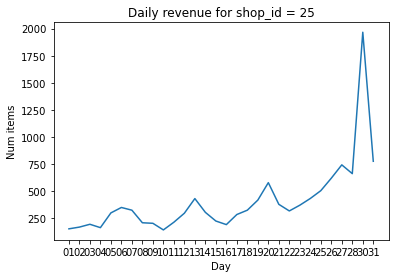

Current answer for task total_num_items_sold_var is: 117167.70229885059


In [213]:
shop_id = 25

total_num_items_sold = items_sold_per_day.values
days = items_sold_per_day.index

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

total_num_items_sold_var = items_sold_per_day.var()
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [229]:
STUDENT_EMAIL = 'adamdmurphy4@gmail.com'
STUDENT_TOKEN = '2J61Taxmfiut9sBp'
grader.status()

You want to submit these numbers:
Task max_revenue: 7982852.199999956
Task category_id_with_max_revenue: 20
Task num_items_constant_price: 5926
Task total_num_items_sold_var: 117167.70229885059


In [230]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Well done! :)